In [1]:
import matplotlib
matplotlib.use('agg')
matplotlib.rc('text', usetex=True)

params = {
    #'font.family': 'serif',
    'text.usetex': True,
    'text.latex.unicode': True
}

matplotlib.rcParams.update(params)

%matplotlib inline

In [2]:
import statsmodels.sandbox.stats.multicomp as mc

In [3]:
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

In [4]:
ddd_file = "/home/bmalone/research/hash-based-ddd/running-times.csv"
ddd = pd.read_csv(ddd_file)

In [5]:
algorithms = ['sHDD', 'hHDD', 'hHDD-pack', 'sDD']
mem_limits = ['25M', '50M', '75M']

algorithms_tex = [r'\textsc{sHDD}', r'\textsc{hHDD}', r'\textsc{hHDD-pack}', r'\textsc{SDD}']
mem_limits_tex = [r'$25e6$', r'$50e6$', r'$75e6$']

num_algorithms = len(algorithms)
num_mem_limits = len(mem_limits)

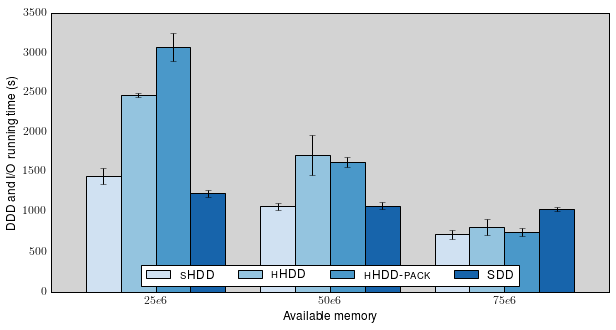

In [6]:
image_name = "/home/bmalone/research/hash-based-ddd/journal-analysis/ddd-running-times.eps"
fig, ax = plt.subplots(figsize=(10, 5))
cmap = plt.cm.Blues

ind = np.arange(num_mem_limits)
width = 0.2
fontsize = 12

algorithm_means = collections.defaultdict(list)
algorithm_stds = collections.defaultdict(list)

for i, mem_limit in enumerate(mem_limits):
    for j, algorithm in enumerate(algorithms):
        a = "{}_{}".format(algorithm, mem_limit)
        
        m_a = ddd['Algorithm'] == a
        times = ddd.loc[m_a, 'Time']
        
        algorithm_means[algorithm].append(np.mean(times))
        algorithm_stds[algorithm].append(np.std(times))
        
shdd_bars = ax.bar(ind, algorithm_means['sHDD'], width, color=cmap(0.2), 
                   yerr=algorithm_stds['sHDD'], ecolor='k', label=algorithms_tex[0])
hhdd_bars = ax.bar(ind+width, algorithm_means['hHDD'], width, color=cmap(0.4), 
                   yerr=algorithm_stds['hHDD'], ecolor='k', label=algorithms_tex[1])
hhddp_bars = ax.bar(ind+2*width, algorithm_means['hHDD-pack'], width, color=cmap(0.6), 
                    yerr=algorithm_stds['hHDD-pack'], ecolor='k', label=algorithms_tex[2])
sdd_bars = ax.bar(ind+3*width, algorithm_means['sDD'], width, color=cmap(0.8), 
                  yerr=algorithm_stds['sDD'], ecolor='k', label=algorithms_tex[3])


ax.set_xticklabels(mem_limits_tex)
ax.set_xticks(ind + 2*width)

ax.set_xlim((-width, num_mem_limits))
ax.set_ylim((1, 3500))

ax.tick_params(axis='both', which='both', labelsize=fontsize)
ax.tick_params(axis='both', which='both', length=0)

bars = (shdd_bars, hhdd_bars, hhddp_bars, sdd_bars)
#ax.legend(bars, algorithms_tex, fontsize=fontsize, loc='lower center', ncol=4)
ax.legend(fontsize=fontsize, loc='lower center', ncol=4)

ax.set_xlabel('Available memory', fontsize=fontsize)
ax.set_ylabel('DDD and I/O running time (s)', fontsize=fontsize)

ax.set_axis_bgcolor('lightgray')

if image_name is not None:
    fig.savefig(image_name, bbox_inches='tight')

sHDD hHDD \textsc{sHDD}
sHDD hHDD-pack \textsc{sHDD}
sHDD sDD \textsc{SDD}
hHDD hHDD-pack \textsc{hHDD}
hHDD sDD \textsc{SDD}
hHDD-pack sDD \textsc{SDD}
sHDD hHDD \textsc{sHDD}
sHDD hHDD-pack \textsc{sHDD}
sHDD sDD \textsc{sHDD}
hHDD hHDD-pack \textsc{hHDD-pack}
hHDD sDD \textsc{SDD}
hHDD-pack sDD \textsc{SDD}
sHDD hHDD \textsc{sHDD}
sHDD hHDD-pack \textsc{sHDD}
sHDD sDD \textsc{sHDD}
hHDD hHDD-pack \textsc{hHDD-pack}
hHDD sDD \textsc{hHDD}
hHDD-pack sDD \textsc{hHDD-pack}
1.5 0.5 1 0
2.5 0.5 2 0
3.5 0.5 3 0
2.5 1.5 2 1
3.5 1.5 3 1
3.5 2.5 3 2
1.5 0.5 1 0
2.5 0.5 2 0
3.5 0.5 3 0
2.5 1.5 2 1
3.5 1.5 3 1
3.5 2.5 3 2
1.5 0.5 1 0
2.5 0.5 2 0
3.5 0.5 3 0
2.5 1.5 2 1
3.5 1.5 3 1
3.5 2.5 3 2


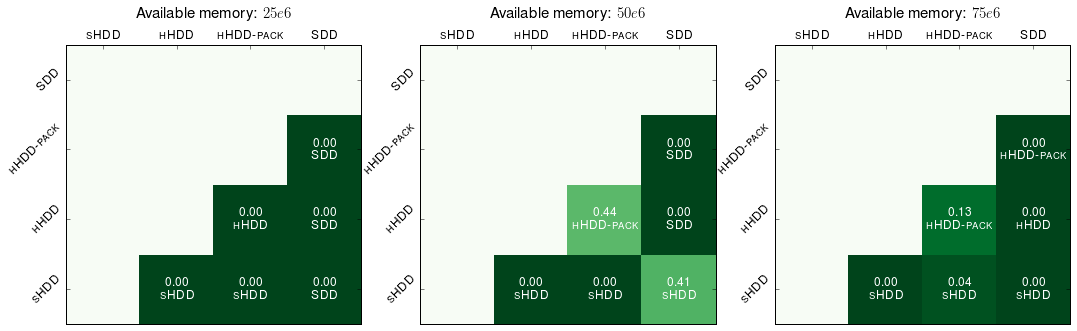

In [9]:
all_pvals = []
all_lower_means = []
for mem_limit in mem_limits:
    pvals = np.zeros((num_algorithms, num_algorithms))
    lower_means = np.empty((num_algorithms, num_algorithms), dtype=object)
    
    for i, algorithm_1 in enumerate(algorithms):
        a_1 = "{}_{}".format(algorithm_1, mem_limit)
        
        for j, algorithm_2 in enumerate(algorithms[i+1:]):
            a_2 = "{}_{}".format(algorithm_2, mem_limit)
        

            m_algorithm_1 = ddd['Algorithm'] == a_1
            m_algorithm_2 = ddd['Algorithm'] == a_2

            times_1 = ddd.loc[m_algorithm_1, 'Time']
            times_2 = ddd.loc[m_algorithm_2, 'Time']

            r = scipy.stats.ranksums(times_1, times_2)
            
            # divide by two because scipy.stats.ranksums gives a 2-tailed p-value
            
            # and we want a one-tailed p-value
            pvals[i, j+i+1] = 1-(r.pvalue/2)
            
            lower_mean = algorithms_tex[i]
            if np.mean(times_1) > np.mean(times_2):
                lower_mean = algorithms_tex[j+i+1]
                
            print(algorithm_1, algorithm_2, lower_mean)
                
            lower_means[i, j+i+1] = lower_mean
            
    all_pvals.append(pvals)
    all_lower_means.append(lower_means)
    

# this code is adapted from:
#   http://stackoverflow.com/questions/25071968/heatmap-with-text-in-each-cell-with-matplotlibs-pyplot
def show_values(heatmap, ax, lower_means, **kw):
    heatmap.update_scalarmappable()
    for p, color, value in zip(heatmap.get_paths(), heatmap.get_facecolors(), heatmap.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        
        if x <= y:
            continue
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
            
        val = 1-value
        
        x_ind = int(np.floor(x))
        y_ind = int(np.floor(y))
        
        print(x, y, x_ind, y_ind)
        #lower_mean = lower_means[x_ind, y_ind]
        lower_mean = lower_means[y_ind, x_ind]
        
        text = "{:.2f}\n{}".format(val, lower_mean)
        
        ax.text(x, y, text, ha="center", va="center", color=color, **kw)


title_fontsize = 15
fontsize = 12
image_name = "/home/bmalone/research/hash-based-ddd/journal-analysis/pvalues.eps"
fig, axes = plt.subplots(ncols=num_mem_limits, figsize=(6*num_mem_limits, 5))
for i, mem_limit in enumerate(mem_limits):

    data = all_pvals[i]
    heatmap = axes[i].pcolor(data, cmap=plt.cm.Greens)

    # put the major ticks at the middle of each cell
    axes[i].set_xticks(np.arange(data.shape[0])+0.5, minor=False)
    axes[i].set_yticks(np.arange(data.shape[1])+0.5, minor=False)

    # want a more natural, table-like display
    #ax.invert_yaxis()
    axes[i].xaxis.tick_top()

    axes[i].set_xticklabels(algorithms_tex, minor=False, fontsize=fontsize)
    axes[i].set_yticklabels(algorithms_tex, minor=False, rotation='45', fontsize=fontsize)
    
    title = "Available memory: {}".format(mem_limits_tex[i])
    axes[i].set_title(title, y=1.08, fontsize=title_fontsize)

    show_values(heatmap, axes[i], all_lower_means[i], fontsize=fontsize)

if image_name is not None:
    fig.savefig(image_name, bbox_inches='tight')

In [13]:
all_pvals

[array([[ 0.        ,  0.99984295,  0.99984295,  0.99984295],
        [ 0.        ,  0.        ,  0.99984295,  0.99984295],
        [ 0.        ,  0.        ,  0.        ,  0.99984295],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]),
 array([[ 0.        ,  0.99984295,  0.99984295,  0.17940416],
        [ 0.        ,  0.        ,  0.12017084,  0.99984295],
        [ 0.        ,  0.        ,  0.        ,  0.99984295],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]),
 array([[ 0.        ,  0.9934983 ,  0.91790129,  0.99984295],
        [ 0.        ,  0.        ,  0.74316074,  0.99971488],
        [ 0.        ,  0.        ,  0.        ,  0.99984295],
        [ 0.        ,  0.        ,  0.        ,  0.        ]])]

In [14]:
all_pvals[0]

array([[ 0.        ,  0.99984295,  0.99984295,  0.99984295],
       [ 0.        ,  0.        ,  0.99984295,  0.99984295],
       [ 0.        ,  0.        ,  0.        ,  0.99984295],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [8]:
r

RanksumsResult(statistic=-3.7796447300922722, pvalue=0.00015705228423075119)